In [10]:
import glob
from GeospatialPreProcessing_Utils import *
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.ops import unary_union
from rasterio.mask import mask
import numpy as np

In [ ]:
##### DATASET DOWNLOAD LINKS #####
# nhd dataset (watershed boundaries)...
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Hydrography/NHD/State/Shape/NHD_H_Kentucky_State_Shape.zip

# ky state boundary...
# https://prd-tnm.s3.amazonaws.com/StagedProducts/GovtUnit/Shape/GOVTUNIT_Kentucky_State_Shape.zip

# 1/3-arc-second usgs dem tiles...
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w087_20210617.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w084_20220311.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w089_20240104.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w082_20230911.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w086_20210617.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w083_20230911.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w090_20231226.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w088_20221205.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w088_20230407.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w083_20220512.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w086_20190716.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w088_20230407.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w085_20220311.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w090_20231226.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w082_20220512.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w085_20230407.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w084_20230123.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w088_20221205.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w087_20230407.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w084_20200302.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w085_20230407.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w085_20171101.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w086_20230407.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w089_20221205.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w084_20181127.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w082_20230911.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w087_20230407.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w083_20230816.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w089_20230123.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w090_20221205.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n39w083_20230911.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n40w090_20230303.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w089_20220318.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w082_20230816.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n38w086_20230407.tif
# https://prd-tnm.s3.amazonaws.com/StagedProducts/Elevation/13/TIFF/historical/n40w087/USGS_13_n37w087_20230407.tif

# Merge DEM Tiles

In [29]:
# directory containing the geotiff tiles for merging
dem_tiles_dir = r'C:\Users\mamass1\Desktop\DEM_10m'

# path to output file name for new mosaic geotiff
output_path = r'C:\Users\mamass1\Desktop\test.tif'

# call custom function to merge tiles and save new raster
mosaic_dem_tiles(dem_tiles_dir, output_path)

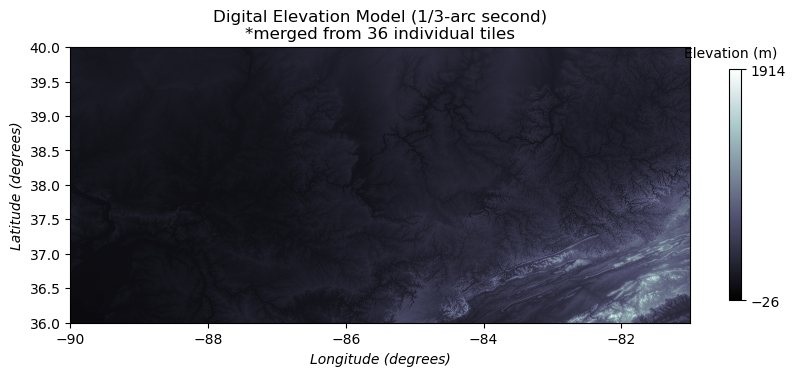

In [30]:
# plot the mosaiced raster...
# open new mosaic dem as rasterio dataset
dem = rasterio.open(output_path)

# create fig and ax objects, define figure size
fig, ax = plt.subplots(figsize=(10, 6))

# rasterio.plot.show correctly plots raster's spatial extent
cax = show(dem, ax=ax, cmap='gist_earth')

# set colorbar legend...
im = cax.get_images()[0]     # get image object for colorbar
cbar = fig.colorbar(im, ax=ax, shrink=0.75)     # create colorbar object
cbar.set_ticks([dem.read(1).min(), dem.read(1).max()])
cbar.set_label('Elevation (m)', labelpad=-40, y=1.1, rotation=0)     # set colorbar label

# title and labels...
# number of tiles used
n_tiles = len(glob.glob(os.path.join(dem_tiles_dir, '*.tif')))
ax.set_title(f'Digital Elevation Model (1/3-arc second)\n*merged from {n_tiles} individual tiles')
ax.set_xlabel('Longitude (degrees)')
ax.set_ylabel('Latitude (degrees)')
plt.show()

# close dem dataset
dem.close()

# Extract Watersheds of Kentucky

In [31]:
# path to kentucky state boundary (area polygon) shapefile
kentucky_boundary_path = r'C:\Users\mamass1\OneDrive - University of Kentucky\CS628_Project\KY_Boundaries\GU_StateOrTerritory.shp'

# path to huc10 watershed boundaries (area polygon) shapefile
huc10_watersheds_path = r'C:\Users\mamass1\OneDrive - University of Kentucky\CS628_Project\KY_NHD\WBDHU10.shp'

# read shapefiles into geodataframes
gdf_ky = gpd.read_file(kentucky_boundary_path)
gdf_huc10 = gpd.read_file(huc10_watersheds_path)

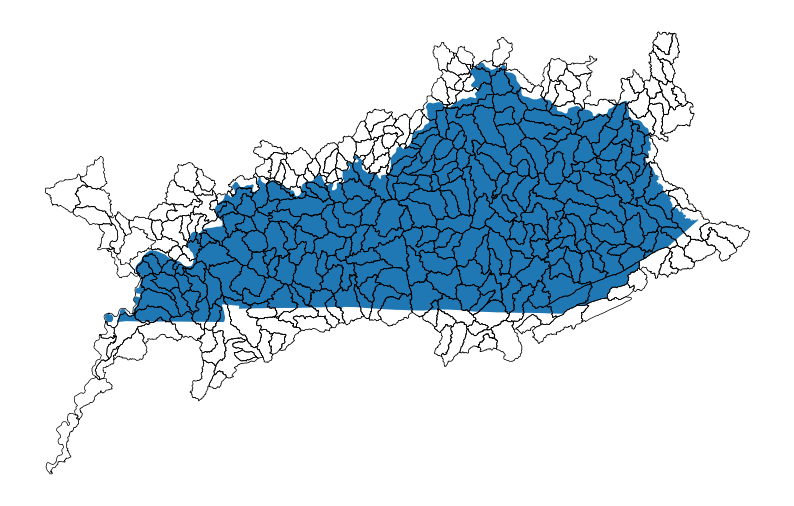

In [32]:
# plot shapefiles...
fig, ax = plt.subplots(figsize=(10,10))

# plot kentucy polyon on bottom
gdf_ky.plot(ax=ax)

# plot outlines of huc10 watersheds on top
gdf_huc10.boundary.plot(ax=ax, edgecolor='k', linewidth=0.5)

# turn off axes
ax.axis('off')
plt.show()

In [33]:
# extract huc10 watersheds that are within or intersect kentucky using spatial join
gdf_ky_huc10 = gpd.sjoin(left_df = gdf_huc10, 
                         right_df = gdf_ky, 
                         how = 'inner', 
                         predicate = 'intersects')

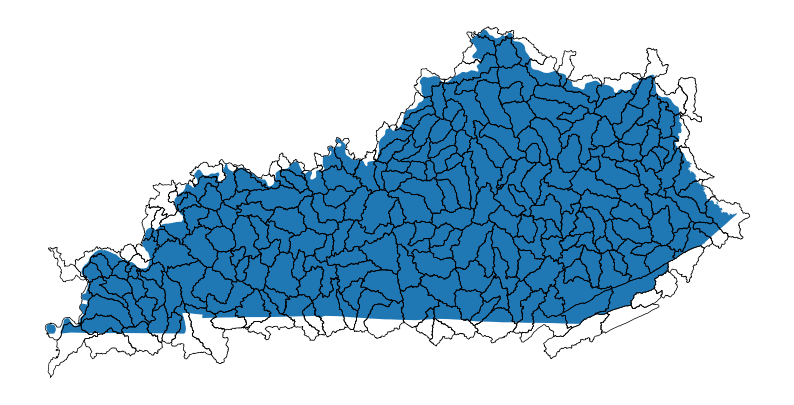

In [34]:
# plot extracted watershed boundaries to verify...
fig, ax = plt.subplots(figsize=(10,10))
gdf_ky.plot(ax=ax)
gdf_ky_huc10.boundary.plot(ax=ax, edgecolor='k', linewidth=0.5)
ax.axis('off')
plt.show()

In [35]:
# clean up unnecessary columns in new huc10 boundaries
gdf_ky_huc10.drop(columns=['tnmid', 'metasource', 'sourcedata', 'sourceorig', 'sourcefeat',
                           'areaacres','states','ObjectID_left', 'index_right','permanent_',
                           'source_fea', 'source_dat', 'source_d_1', 'source_ori','loaddate_right', 
                           'fcode', 'state_fips', 'state_name', 'population','areasqkm_right', 
                           'gnis_id', 'gnis_name', 'shape_Leng_right','shape_Area_right', 
                           'ObjectID_right', 'referenceg', 'hutype', 'humod', 'shape_Leng_left', 
                           'shape_Area_left'], inplace=True)

# rename remaining columns
gdf_ky_huc10.rename(columns={'loaddate_left':'loaddate', 'areasqkm_left':'areasqkm'}, inplace=True)

# reset index
gdf_ky_huc10.reset_index(drop=True, inplace=True)

In [72]:
# save extracted huc10 watersheds as shapefile...
# output path for new shapefile
output_shapfile_path = r'/Users/Matthew/OneDrive - University of Kentucky/CS628_Project/KY_NHD/ky_huc10.shp'

# save shapefile
gdf_ky_huc10.to_file(output_shapfile_path)

# Clip DEM to Watersheds Extent

In [11]:
# paths to dem and shapefile to be used for clipping dem
dem_path = r'C:\Users\mamass1\Desktop\test.tif'
polygon_clip_path = r'C:\Users\mamass1\OneDrive - University of Kentucky\CS628_Project\KY_NHD\ky_huc10.shp'

# get boundary for clipping...
# read shapefile into geodataframe
gdf_ky_huc10 = gpd.read_file(polygon_clip_path)

# combine all polygons and get outline geometry of shapefile
watershed_outline = unary_union(gdf_ky_huc10.geometry)

In [14]:
# clip the raster...
# open the raster file
with rasterio.open(dem_path) as dem:
    
    # clip the raster with the merged polygon
    output_dem, output_transform = mask(dem, [watershed_outline], crop=True)
    
    # copy the metadata of the source raster
    output_metadata = dem.meta.copy()

# update the metadata to match the clipped raster
output_metadata.update({'driver': 'GTiff',
                        'height': output_dem.shape[1],
                        'width': output_dem.shape[2],
                        'transform': output_transform})

# save the clipped raster...
# path for clipped raster output
output_path = r'C:\Users\mamass1\Desktop\test_clipped.tif'

# write the clipped raster to a new file
with rasterio.open(output_path, "w", **output_metadata) as clipped_dem:
    clipped_dem.write(output_dem)

# Plot Geospatial Data

In [53]:
# path to kentucky state boundary shapefile
kentucky_boundary_path = r'C:\Users\mamass1\OneDrive - University of Kentucky\CS628_Project\KY_Boundaries\GU_StateOrTerritory.shp'

# path to clipped huc10 watershed boundaries shapefile
huc10_watersheds_path = r'C:\Users\mamass1\OneDrive - University of Kentucky\CS628_Project\KY_NHD\ky_huc10.shp'

# read shapefiles into geodataframes
gdf_ky = gpd.read_file(kentucky_boundary_path)
gdf_huc10 = gpd.read_file(huc10_watersheds_path)

# path to clipped dem
clipped_dem_path = r'C:\Users\mamass1\Desktop\test_clipped.tif'

# open new mosaic dem as rasterio dataset
dem = rasterio.open(clipped_dem_path)

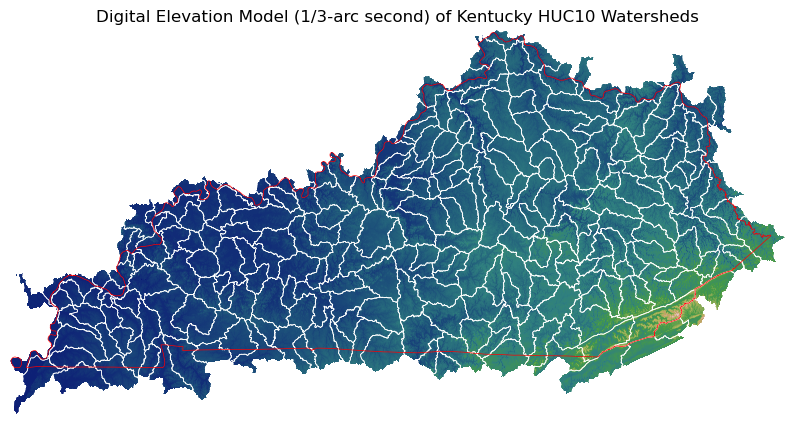

In [56]:
# plot the mosaiced raster...
# create fig and ax objects, define figure size
fig, ax = plt.subplots(figsize=(10, 6))

# plot dem...
cax = show(dem, ax=ax, cmap='gist_earth')

# dem colorbar...
im = cax.get_images()[0]
cbar = fig.colorbar(im, ax=ax, shrink=0.75)
cbar.set_ticks([dem.read(1).min(), dem.read(1).max()])
cbar.set_label('Elevation (m)', labelpad=-40, y=1.1, rotation=0)

# plot watershed outlines...
gdf_huc10.boundary.plot(ax=ax, facecolor='none', edgecolor='white', linewidth=0.5)

# plot ky state outline...
gdf_ky.boundary.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=0.5)

# title and labels...
ax.set_title('Digital Elevation Model (1/3-arc second) of Kentucky HUC10 Watersheds')
ax.axis('off')
plt.show()